# **Data Preprocessing**

In [284]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [285]:
bank=pd.read_csv("bank-additional-full.csv",sep=';')

In [286]:
#check if there's no NaN in the dataset
bank.isna().sum()
bank.pop("month")
bank.pop("day_of_week")
bank.head()

,age,job,marital,education,default,housing,loan,contact,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,261,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,149,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,226,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,151,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,307,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


<AxesSubplot:xlabel='marital', ylabel='Count'>

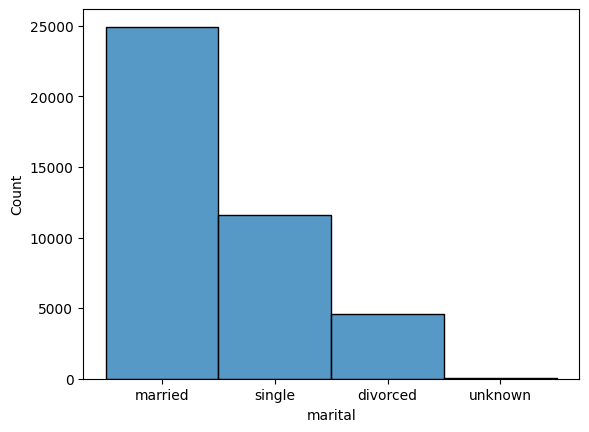

In [287]:
sns.histplot(bank["marital"])

In [288]:
bank.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 19 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   duration        41188 non-null  int64  
 9   campaign        41188 non-null  int64  
 10  pdays           41188 non-null  int64  
 11  previous        41188 non-null  int64  
 12  poutcome        41188 non-null  object 
 13  emp.var.rate    41188 non-null  float64
 14  cons.price.idx  41188 non-null  float64
 15  cons.conf.idx   41188 non-null  float64
 16  euribor3m       41188 non-null  float64
 17  nr.employed     41188 non-null 

In [289]:
str(bank["nr.employed"].dtype)


'float64'

<AxesSubplot:xlabel='education', ylabel='Count'>

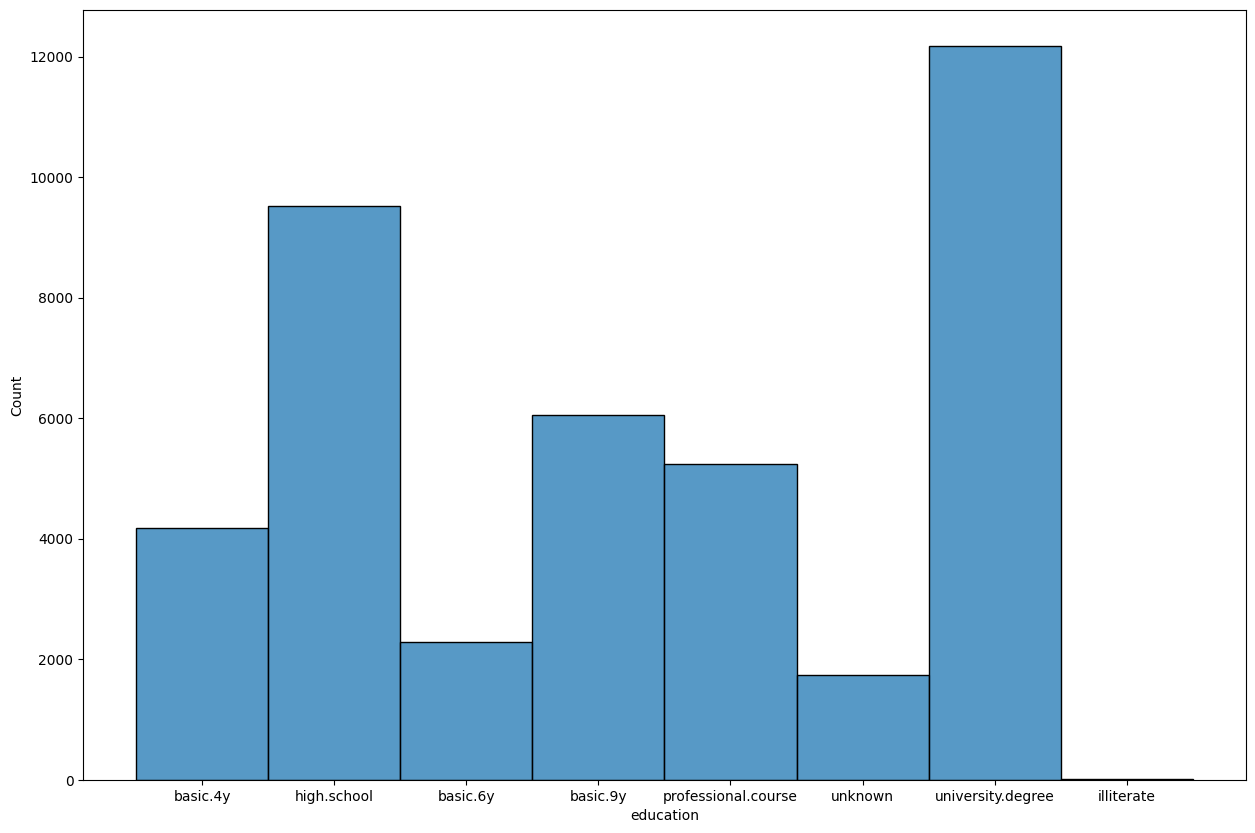

In [290]:
plt.figure(figsize=(15,10))
sns.histplot(bank["education"])

In [291]:
def EncodeLabelData(data:pd.DataFrame):
    '''
    functionality:
        check for any string in the dataframe and encode it in numerical
    input:
        data-> pd.DataFrame
    output:
        data-> data with the encoded strings
        dict-> dictionary that contain encoded label with ID
    '''
    columnString = list()
    UniqueDic={}
    headers=data.columns
    # check for any column that have string elements
    for i in headers:
        element = str(data[i].dtypes)
        if element == "object" or element =="boolean" :
            # append the string
            columnString.append(i)
    # give label unique Id for each string element
    for i in columnString:
        UniqueDic[i] = data[i].unique()
        pass
    # replace string element with special Id
    dict = {}
    for i in UniqueDic.keys():
        for (Id, types) in enumerate(UniqueDic[i]):
            data = data.replace(types, Id)
            dict[types] = Id
            pass
    return data , dict

In [292]:
bankCleaned,encodedlabel=EncodeLabelData(bank)

In [293]:
#check the encode cleaned data
bankCleaned.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 19 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  int64  
 2   marital         41188 non-null  int64  
 3   education       41188 non-null  int64  
 4   default         41188 non-null  int64  
 5   housing         41188 non-null  int64  
 6   loan            41188 non-null  int64  
 7   contact         41188 non-null  int64  
 8   duration        41188 non-null  int64  
 9   campaign        41188 non-null  int64  
 10  pdays           41188 non-null  int64  
 11  previous        41188 non-null  int64  
 12  poutcome        41188 non-null  int64  
 13  emp.var.rate    41188 non-null  float64
 14  cons.price.idx  41188 non-null  float64
 15  cons.conf.idx   41188 non-null  float64
 16  euribor3m       41188 non-null  float64
 17  nr.employed     41188 non-null 

<AxesSubplot:>

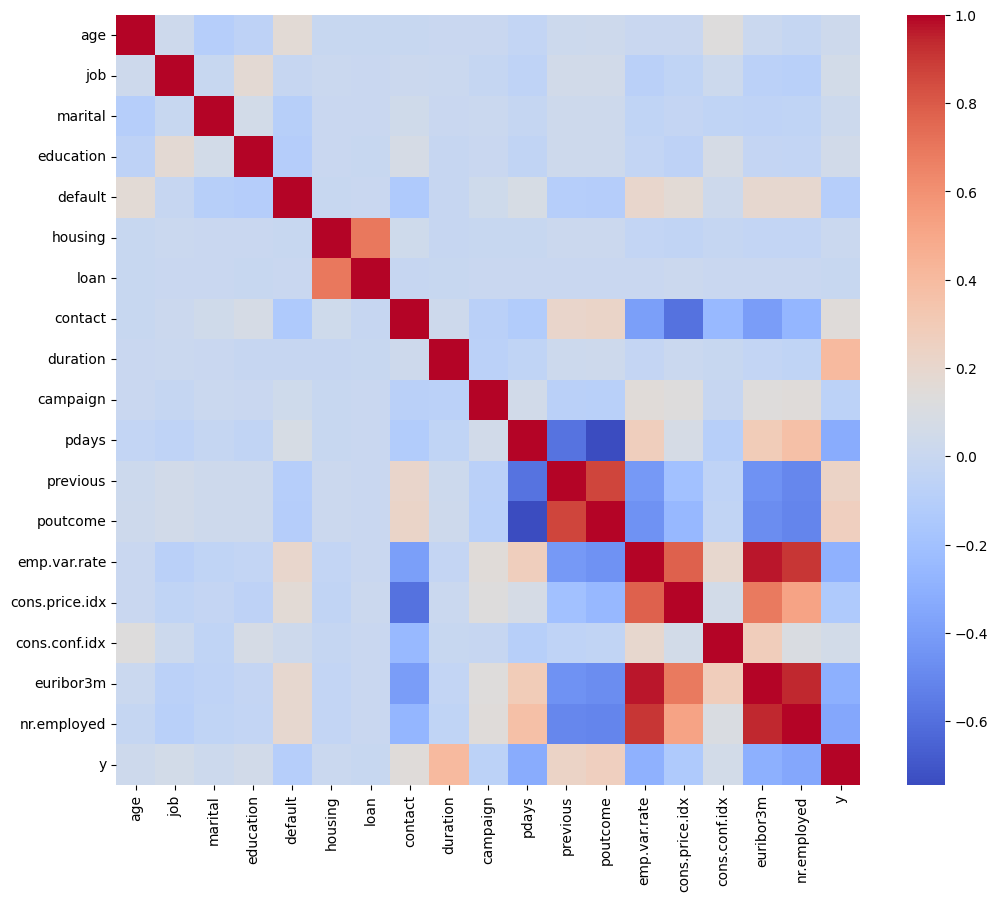

In [294]:
#study the correlation between y and the other data
plt.figure(figsize=(12,10))
sns.heatmap(bankCleaned.corr(),cmap="coolwarm")

In [295]:
from sklearn.preprocessing import StandardScaler,MinMaxScaler
# Initialize the standerdscaler
scaler = MinMaxScaler()

# Fit and transform all numerical columns
bankCleaned[bankCleaned.columns] = scaler.fit_transform(bankCleaned[bankCleaned.columns])

# Display the preprocessed DataFrame
bankCleaned.head()

,age,job,marital,education,default,housing,loan,contact,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,0.481481,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.0,0.053070,0.0,1.0,0.0,0.0,0.9375,0.698753,0.60251,0.957379,0.859735,0.0
1,0.493827,0.090909,0.0,0.111111,1.0,0.000000,0.000000,0.0,0.030297,0.0,1.0,0.0,0.0,0.9375,0.698753,0.60251,0.957379,0.859735,0.0
2,0.246914,0.090909,0.0,0.111111,0.0,0.222222,0.000000,0.0,0.045954,0.0,1.0,0.0,0.0,0.9375,0.698753,0.60251,0.957379,0.859735,0.0
3,0.283951,0.181818,0.0,0.222222,0.0,0.000000,0.000000,0.0,0.030704,0.0,1.0,0.0,0.0,0.9375,0.698753,0.60251,0.957379,0.859735,0.0
4,0.481481,0.090909,0.0,0.111111,0.0,0.000000,0.222222,0.0,0.062424,0.0,1.0,0.0,0.0,0.9375,0.698753,0.60251,0.957379,0.859735,0.0


In [296]:
from sklearn.model_selection import train_test_split

x = bankCleaned.drop('y', axis=1)  # Features
y = bankCleaned['y']  # Target variable

X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.1)

# **Train Using TensorFlow**

In [297]:
from tensorflow import keras
from keras.models import Model,Sequential
from keras.layers import Dense,Dropout

model = Sequential()
model.add(Dense(64, activation='relu', input_dim=X_train.shape[1]))
model.add(Dropout(0.5))#to prevent overfitting
model.add(Dense(480, activation='relu'))
model.add(Dense(1, activation='sigmoid'))#the activation is sigmoid as our problem is classification between 0 and 1

# Compile the model
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'],)

# Train the model
history = model.fit(X_train, y_train, epochs=10, batch_size=32, validation_data=(X_test, y_test))

Epoch 1/10
1159/1159 [==============================] - 6s 5ms/step - loss: 0.2665 - accuracy: 0.9004 - val_loss: 0.2227 - val_accuracy: 0.9026
Epoch 2/10
1159/1159 [==============================] - 4s 4ms/step - loss: 0.2199 - accuracy: 0.9055 - val_loss: 0.2010 - val_accuracy: 0.9068
Epoch 3/10
1159/1159 [==============================] - 5s 4ms/step - loss: 0.2113 - accuracy: 0.9066 - val_loss: 0.2023 - val_accuracy: 0.9051
Epoch 4/10
1159/1159 [==============================] - 5s 4ms/step - loss: 0.2050 - accuracy: 0.9096 - val_loss: 0.1943 - val_accuracy: 0.9041
Epoch 5/10
1159/1159 [==============================] - 6s 5ms/step - loss: 0.2036 - accuracy: 0.9086 - val_loss: 0.2005 - val_accuracy: 0.9046
Epoch 6/10
1159/1159 [==============================] - 5s 4ms/step - loss: 0.2005 - accuracy: 0.9094 - val_loss: 0.1943 - val_accuracy: 0.9080
Epoch 7/10
1159/1159 [==============================] - 5s 4ms/step - loss: 0.2002 - accuracy: 0.9092 - val_loss: 0.1948 - val_accuracy:

129/129 [==============================] - 0s 1ms/step
[[False]
 [False]
 [False]
 ...
 [False]
 [False]
 [False]]


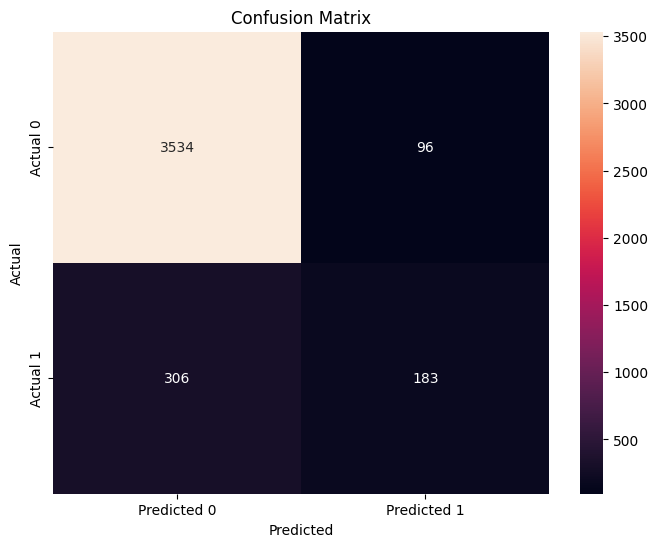

In [298]:
from sklearn.metrics import confusion_matrix
y_pred = model.predict(X_test)
y_pred = (y_pred > 0.5)  
# Create a confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Create a heatmap for the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', 
            xticklabels=['Predicted 0', 'Predicted 1'], 
            yticklabels=['Actual 0', 'Actual 1'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

# **Train using Pytorch**

In [299]:
from torch import nn
from torch import optim
from torch import tensor
import torch 
from torch.utils.data import DataLoader,Dataset
import numpy as np
from torchmetrics.classification import BinaryAccuracy
from tqdm import tqdm

In [300]:
device = torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')

## **Prepare the Data**

In [301]:
class DatasetPrepration(Dataset):
 
  def __init__(self,X,Y):
    self.x=torch.from_numpy(X).float().cuda()
    self.y=torch.from_numpy(Y).float().cuda()
  def __len__(self):
    return len(self.x)
   
  def __getitem__(self,idx):
    return self.x[idx],self.y[idx]

In [302]:
print(f"Is CUDA supported by this system?{torch.cuda.is_available()}")
print(f"CUDA version: {torch.version.cuda}")

Is CUDA supported by this system?True
CUDA version: 11.8


## **Preparing Model**

In [303]:
class BankNN(nn.Module):
    def __init__(self):
        super().__init__()
        self.model=nn.Sequential(
            nn.Linear(18,64),
            nn.ReLU(),
            nn.Dropout(0.2),
            nn.Linear(64,480),
            nn.ReLU(),
            nn.Linear(480,1),
            nn.Sigmoid()
        )
    def forward(self, x):
        return self.model(x)

In [304]:
train_data_set=DatasetPrepration(bankCleaned.drop("y",axis=1).values,bankCleaned["y"].values)
trainLoader=DataLoader(train_data_set,batch_size=32,shuffle=True)


In [305]:
model=BankNN()
model=model.to("cuda")
# loss function and optimizer
loss_fn = nn.BCEWithLogitsLoss()  # binary cross entropy
optimizer = optim.Adam(model.parameters(), lr=1e-3)
epochs=10
for epoch in tqdm (range (epochs), desc=f"loading",ascii=False, ncols=75):
    total_Training_loss=0.0
    for i,data in enumerate(trainLoader,0):
        inputs,target=data
        target=target.reshape((-1,1))
        optimizer.zero_grad()
        pred=model.forward(inputs)
        loss=loss_fn(pred,target)
        total_Training_loss+=loss
        loss.backward()
        optimizer.step()

loading:   0%|                                      | 0/10 [00:00<?, ?it/s]

loading: 100%|█████████████████████████████| 10/10 [00:41<00:00,  4.15s/it]


In [310]:
test_pred=model.forward(torch.from_numpy(X_test.values).float().to("cuda"))

In [311]:
test_pred=test_pred.cpu()

In [312]:
test_pred.detach().numpy().reshape(-1,)
test_pred=(test_pred>0.5)
final=test_pred.reshape(-1)

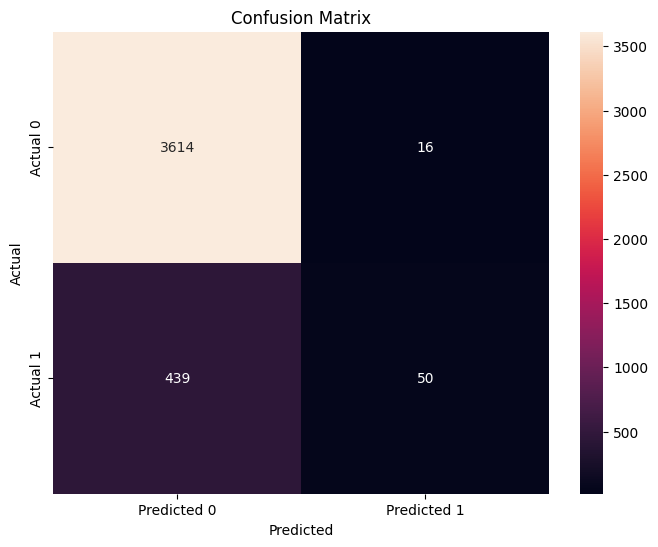

In [313]:
# Create a confusion matrix
cm = confusion_matrix(y_test, final)

# Create a heatmap for the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', 
            xticklabels=['Predicted 0', 'Predicted 1'], 
            yticklabels=['Actual 0', 'Actual 1'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()